In [1]:
import copy

import pandas as pd
import sys
import math

sys.path.append('../Coding')
from itertools import combinations
from Algorithms import pattern_count
import time
from Algorithms import NewAlgRanking_19_20211216 as newalg
from Algorithms import NaiveAlgRanking_4_20211213 as naivealg
import numpy as np
import copy
import sys
import math
from sklearn.linear_model import LinearRegression
import shap

from Algorithms import NewAlgRanking_definition2_13_20220509 as newalg2
from Algorithms import NaiveAlgRanking_definition2_5_20220506 as naivealg2


In [173]:
def P1DominatedByP2(P1, P2):
    length = len(P1)
    for i in range(length):
        if P1[i] == -1:
            if P2[i] != -1:
                return False
        if P1[i] != -1:
            if P2[i] != P1[i] and P2[i] != -1:
                return False
    return True

def tuples_in_group(group, data):
    def belong_to_group(row):
        nonlocal group
        if P1DominatedByP2(row, group):
            return True
        else:
            return False
    data["in"] = data.apply(belong_to_group, axis=1)
    return data[data["in"] == True].index

def average_shapley_values_of_group(data, group, all_attributes, shap_values, output_file):
    # get all tuples in this group
    data1 = data[all_attributes].copy(deep=True)
    tuples_idx = tuples_in_group(group, data1).to_list()
    if len(tuples_idx) == 0:
        output_file.write("\ngroup {} size {}\n".format(group, len(tuples_idx)))
        print("group {} size {}".format(group, len(tuples_idx)))
    else:
        avg = np.average(shap_values.values[tuples_idx], axis=0)
        output_file.write("\ngroup {} size {}\n".format(group, len(tuples_idx)))
        output_file.write(str(avg))
        print("group {} size {}".format(group, len(tuples_idx)))
        print(avg)

def tuples_in_group_w_attribute(group, data, att, value):
    def belong_to_group(row):
        nonlocal group
        if P1DominatedByP2(row, group):
            if row[att] == value:
                return True
            else:
                return False
        else:
            return False
    data["in"] = data.apply(belong_to_group, axis=1)
    idx = data[data["in"] == True].index
    data.drop(columns=["in"], axis=1, inplace=True)
    return idx


def shapley_values_att_value_seperated(data, group, all_attributes, shap_values, output_file):
    # get all tuples in this group
    data1 = data[all_attributes].copy(deep=True)
    att_idx = 0
    for att in all_attributes:
        for v in range(int(data1.describe()[att]["min"]), int(data1.describe()[att]["max"]) + 1):
            tuples_idx = tuples_in_group_w_attribute(group, data1, att, v).to_list()
            if len(tuples_idx) == 0:
                output_file.write("group {} att {} = {} size {}\n".format(group, att, v, len(tuples_idx)))
                print("group {} att {} = {} size {}".format(group, att, v, len(tuples_idx)))
            else:
                values_of_group = shap_values.values[tuples_idx]
                avg = np.average(values_of_group, axis=0)
                print("group {} att {} = {} size {}\n avg {}".format(group, att, v, len(tuples_idx), avg))
                output_file.write("group {} att {} = {} size {} avg {}\n".format(group, att, v, len(tuples_idx), avg[att_idx]))
        att_idx += 1



# compas

In [9]:

all_attributes = ["age_binary", "sex_binary", "race_C", "MarriageStatus_C", "juv_fel_count_C", "decile_score_C", "juv_misd_count_C", "juv_other_count_C", "priors_count_C", "days_b_screening_arrest_C",
                  "c_days_from_compas_C", "c_charge_degree_C", "v_decile_score_C", "start_C", "end_C",
                  "event_C"]

original_data_file = r"../../../InputData/CompasData/general/compas_data_cat_necessary_att_ranked.csv"

ranked_data = pd.read_csv(original_data_file, index_col=False)


In [15]:
selected_attributes = all_attributes
ranked_data = ranked_data[all_attributes]

k = 50
k_min = k
k_max = k
thc = 50
Lowerbounds = [40]
time_limit = 5*60
data_topk = ranked_data[:k]
result1, num_patterns_visited1_, t1_ \
    = newalg.GraphTraverse(
    ranked_data, selected_attributes, thc,
    Lowerbounds,
    k_min, k_max, time_limit)
groups = result1[0]
for g in groups:
    print(g)

[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, 2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, 2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, 4, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, 6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, 2, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 

# student data


## definition 1: global bounds

In [233]:

all_attributes = ['school_C', 'sex_C', 'age_C', 'address_C', 'famsize_C', 'Pstatus_C', 'Medu_C',
                  'Fedu_C', 'Mjob_C', 'Fjob_C', 'reason_C', 'guardian_C', 'traveltime_C', 'studytime_C',
                  'failures_C', 'schoolsup_C', 'famsup_C', 'paid_C', 'activities_C', 'nursery_C', 'higher_C',
                  'internet_C', 'romantic_C', 'famrel_C', 'freetime_C', 'goout_C', 'Dalc_C', 'Walc_C',
                  'health_C', 'absences_C', 'G1_C', 'G2_C', 'G3_C']

original_data_file = r"../../../InputData/StudentDataset/ForRanking_1/student-mat_cat_ranked.csv"

ranked_data = pd.read_csv(original_data_file, index_col=False)


### all attributes
too many groups, won't use this

In [6]:
selected_attributes = all_attributes
ranked_data = ranked_data[all_attributes]

k = 50
k_min = k
k_max = k
thc = 50
Lowerbounds = [5]
time_limit = 5*60
data_topk = ranked_data[:k]
result1, num_patterns_visited1_, t1_ \
    = newalg.GraphTraverse(
    ranked_data, selected_attributes, thc,
    Lowerbounds,
    k_min, k_max, time_limit)
groups = result1[0]
for g in groups:
    print(g)

newalg overtime
[-1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, 3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 4, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,

In [10]:
output_path = r'student_unfairly_treated_def1.txt'
output_file = open(output_path, "w")
for g in groups:
    output_file.write(str(g))
    output_file.write(",\n")

### 16 att
still too many groups

In [6]:
selected_attributes = \
    ['school_C', 'sex_C', 'age_C', 'address_C', 'famsize_C', 'Pstatus_C',
     'Medu_C', 'Fedu_C', 'Mjob_C', 'Fjob_C', 'reason_C',
     'health_C', 'absences_C', 'G1_C', 'G2_C', 'G3_C']
ranked_data = ranked_data[selected_attributes]

k = 50
k_min = k
k_max = k
thc = 50
Lowerbounds = [5]
time_limit = 5*60
data_topk = ranked_data[:k]
result1, num_patterns_visited1_, t1_ \
    = newalg.GraphTraverse(
    ranked_data, selected_attributes, thc,
    Lowerbounds,
    k_min, k_max, time_limit)
groups = result1[0]
for g in groups:
    print(g)


[-1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, 3, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1]
[0, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, 1, -1, -1, -1, -1, 2, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, 1, -1, -1, -1, -1, 3, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, 1, -1, -1, -1, -1, -1, -1, 4, -1, -1, -1, -1, -1, -1, -1]
[-1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 2, -1, -1, -1, -1, -1]
[-1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 3, -1, -1, -1, -1]
[-1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 5, -1, -1, -1, -1]
[-1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 2]
[-1, -1, -1, 0, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, 1, -1, -1, -1, -1, -1, 4, -1, -1, -1,

In [9]:
output_path = r'student_unfairly_treated_def1_10att.txt'
output_file = open(output_path, "w")
for g in groups:
    output_file.write(str(g))
    output_file.write(",\n")


### reproduce case in paper Sec VI.C: 4 att

In [170]:
original_data_file = r"../../../InputData/StudentDataset/ForRanking_1/student-mat_cat_ranked.csv"
ranked_data = pd.read_csv(original_data_file, index_col=False)
selected_attributes = \
    ['school_C', 'sex_C', 'age_C', 'address_C']

k = 10
k_min = k
k_max = k
thc = 50
Lowerbounds = [10]
time_limit = 5*60
result1, num_patterns_visited1_, t1_ \
    = newalg.GraphTraverse(
    ranked_data[selected_attributes], selected_attributes, thc,
    Lowerbounds,
    k_min, k_max, time_limit)
groups = result1[0]
for g in groups:
    print(g)


[0, -1, -1, -1]
[-1, 0, -1, -1]
[-1, 1, -1, -1]
[-1, -1, -1, 0]
[-1, -1, -1, 1]


In [171]:

x = ranked_data[selected_attributes]
y = ranked_data['rank']

# with sklearn
model = LinearRegression()
model.fit(x, y)
print("Model coefficients:\n")
for i in range(x.shape[1]):
    print(x.columns[i], "=", model.coef_[i].round(5))
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, x)
shap_values = explainer(x)
shap_values

Model coefficients:

school_C = 20.46408
sex_C = 25.8546
age_C = 50.75666
address_C = 32.52389


.values =
array([[ -4.09281667, -13.44439255,  -3.5529662 ,  -6.50477782],
       [ -4.09281667, -13.44439255,  -3.5529662 ,  -6.50477782],
       [ -4.09281667, -13.44439255,  -3.5529662 ,  -6.50477782],
       ...,
       [ 16.37126667, -13.44439255,  47.20369375,  26.0191113 ],
       [ 16.37126667,  12.41020851,  47.20369375,  26.0191113 ],
       [ 16.37126667,  12.41020851,  -3.5529662 ,  -6.50477782]])

.base_values =
array([198.62495264, 198.62495264, 198.62495264, 198.62495264,
       198.62495264, 198.62495264, 198.62495264, 198.62495264,
       198.62495264, 198.62495264, 198.62495264, 198.62495264,
       198.62495264, 198.62495264, 198.62495264, 198.62495264,
       198.62495264, 198.62495264, 198.62495264, 198.62495264,
       198.62495264, 198.62495264, 198.62495264, 198.62495264,
       198.62495264, 198.62495264, 198.62495264, 198.62495264,
       198.62495264, 198.62495264, 198.62495264, 198.62495264,
       198.62495264, 198.62495264, 198.62495264, 198.62495264,
    

In [172]:

# for the whole dataset
output_path = r'student_avg_wholedata.txt'
output_file = open(output_path, "w")
output_file.write(", ".join(all_attributes))
output_file.write("\n")
for g in groups:
    average_shapley_values_of_group(ranked_data[:k], g, selected_attributes, shap_values, output_file)



group [0, -1, -1, -1] size 9
[-4.09281667 -7.69892565 -3.5529662  -6.50477782]
group [-1, 0, -1, -1] size 7
[ -4.09281667 -13.44439255  -3.5529662   -6.50477782]
group [-1, 1, -1, -1] size 3
[ 2.72854444 12.41020851 -3.5529662   4.33651855]
group [-1, -1, -1, 0] size 9
[-4.09281667 -7.69892565 -3.5529662  -6.50477782]
group [-1, -1, -1, 1] size 1
[16.37126667 12.41020851 -3.5529662  26.0191113 ]


In [177]:

output_path = r'student_avg_topk_value_seperated_4att.txt'
output_file = open(output_path, "w")
output_file.write(", ".join(selected_attributes))
output_file.write("\n")
print(selected_attributes)
shapley_values_att_value_seperated(ranked_data[:k], [0, -1, -1, -1], selected_attributes, shap_values, output_file)

['school_C', 'sex_C', 'age_C', 'address_C']
group [0, -1, -1, -1] att school_C = 0 size 9
 avg [-4.09281667 -7.69892565 -3.5529662  -6.50477782]
group [0, -1, -1, -1] att school_C = 1 size 0
group [0, -1, -1, -1] att sex_C = 0 size 7
 avg [ -4.09281667 -13.44439255  -3.5529662   -6.50477782]
group [0, -1, -1, -1] att sex_C = 1 size 2
 avg [-4.09281667 12.41020851 -3.5529662  -6.50477782]
group [0, -1, -1, -1] att age_C = 0 size 9
 avg [-4.09281667 -7.69892565 -3.5529662  -6.50477782]
group [0, -1, -1, -1] att address_C = 0 size 9
 avg [-4.09281667 -7.69892565 -3.5529662  -6.50477782]
group [0, -1, -1, -1] att address_C = 1 size 0


In [178]:
output_path = r'student_avg_topk_value_seperated_4att.txt'
output_file = open(output_path, "w")
output_file.write(", ".join(selected_attributes))
output_file.write("\n")
print(selected_attributes)
shapley_values_att_value_seperated(ranked_data[:k], [-1, 0, -1, -1], selected_attributes, shap_values, output_file)




['school_C', 'sex_C', 'age_C', 'address_C']
group [-1, 0, -1, -1] att school_C = 0 size 7
 avg [ -4.09281667 -13.44439255  -3.5529662   -6.50477782]
group [-1, 0, -1, -1] att school_C = 1 size 0
group [-1, 0, -1, -1] att sex_C = 0 size 7
 avg [ -4.09281667 -13.44439255  -3.5529662   -6.50477782]
group [-1, 0, -1, -1] att sex_C = 1 size 0
group [-1, 0, -1, -1] att age_C = 0 size 7
 avg [ -4.09281667 -13.44439255  -3.5529662   -6.50477782]
group [-1, 0, -1, -1] att address_C = 0 size 7
 avg [ -4.09281667 -13.44439255  -3.5529662   -6.50477782]
group [-1, 0, -1, -1] att address_C = 1 size 0


In [ ]:
output_path = r'student_avg_wholedata_value_seperated.txt'
output_file = open(output_path, "w")
output_file.write(", ".join(selected_attributes))
output_file.write("\n")
print(selected_attributes)
for g in groups:
    shapley_values_att_value_seperated(ranked_data[:k], g, selected_attributes, shap_values, output_file)


### 5 att:

In [234]:
original_data_file = r"../../../InputData/StudentDataset/ForRanking_1/student-mat_cat_ranked.csv"
ranked_data = pd.read_csv(original_data_file, index_col=False)
selected_attributes = \
    ['school_C', 'sex_C', 'age_C', 'address_C', 'G3']

k = 10
k_min = k
k_max = k
thc = 50
Lowerbounds = [10]
time_limit = 5*60
result1, num_patterns_visited1_, t1_ \
    = newalg.GraphTraverse(
    ranked_data[selected_attributes], selected_attributes, thc,
    Lowerbounds,
    k_min, k_max, time_limit)
groups = result1[0]
for g in groups:
    print(g)


[0, -1, -1, -1, -1]
[-1, 0, -1, -1, -1]
[-1, 1, -1, -1, -1]
[-1, -1, -1, 0, -1]
[-1, -1, -1, 1, -1]
[-1, -1, -1, -1, 10]


In [235]:

x = ranked_data[selected_attributes]
y = ranked_data['rank']

# with sklearn
model = LinearRegression()
model.fit(x, y)
print("Model coefficients:\n")
for i in range(x.shape[1]):
    print(x.columns[i], "=", model.coef_[i].round(5))
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, x)
shap_values = explainer(x)
shap_values

Model coefficients:

school_C = 21.40619
sex_C = 3.02422
age_C = 10.27229
address_C = 5.38436
G3 = -23.27501


.values =
array([[  -4.28123879,   -1.572592  ,   -0.71906023,   -1.07687156,
        -219.48338389],
       [  -4.28123879,   -1.572592  ,   -0.71906023,   -1.07687156,
        -196.20836969],
       [  -4.28123879,   -1.572592  ,   -0.71906023,   -1.07687156,
        -196.20836969],
       ...,
       [  17.12495517,   -1.572592  ,    9.55322876,    4.30748623,
         246.01690008],
       [  17.12495517,    1.45162338,    9.55322876,    4.30748623,
         246.01690008],
       [  17.12495517,    1.45162338,   -0.71906023,   -1.07687156,
         246.01690008]])

.base_values =
array([196.00746206, 196.00746206, 196.00746206, 196.00746206,
       196.00746206, 196.00746206, 196.00746206, 196.00746206,
       196.00746206, 196.00746206, 196.00746206, 196.00746206,
       196.00746206, 196.00746206, 196.00746206, 196.00746206,
       196.00746206, 196.00746206, 196.00746206, 196.00746206,
       196.00746206, 196.00746206, 196.00746206, 196.00746206,
       196.00746206, 196.007462

In [236]:
np.average(shap_values.values, axis=0)

array([-1.78836557,  0.01990623,  0.03510782,  0.12268157,  3.60320789])

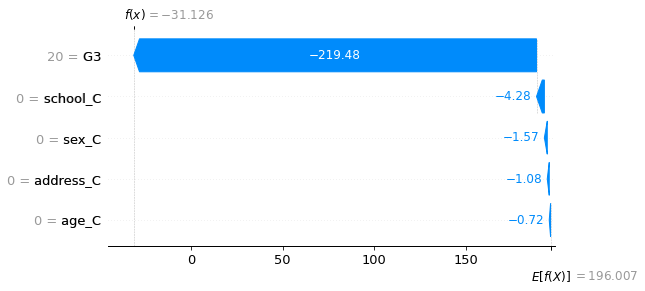

In [237]:
shap.plots.waterfall(shap_values[0])


In [238]:
# for the topk
output_path = r'student_avg_topk_5att.txt'
output_file = open(output_path, "w")
output_file.write(", ".join(all_attributes))
output_file.write("\n")
for g in groups:
    average_shapley_values_of_group(ranked_data[:k], g, selected_attributes, shap_values, output_file)


group [0, -1, -1, -1, -1] size 9
[  -4.28123879   -0.90054413   -0.71906023   -1.07687156 -188.45003163]
group [-1, 0, -1, -1, -1] size 7
[  -4.28123879   -1.572592     -0.71906023   -1.07687156 -189.55836564]
group [-1, 1, -1, -1, -1] size 3
[   2.85415919    1.45162338   -0.71906023    0.71791437 -188.45003163]
group [-1, -1, -1, 0, -1] size 9
[  -4.28123879   -0.90054413   -0.71906023   -1.07687156 -188.45003163]
group [-1, -1, -1, 1, -1] size 1
[  17.12495517    1.45162338   -0.71906023    4.30748623 -196.20836969]
group [-1, -1, -1, -1, 10] size 0


In [239]:

output_path = r'student_avg_topk_value_seperated_5att.txt'
output_file = open(output_path, "w")
output_file.write(", ".join(selected_attributes))
output_file.write("\n")
print(selected_attributes)
shapley_values_att_value_seperated(ranked_data, [-1,-1,-1,1,-1], selected_attributes, shap_values, output_file)

# for g in groups:
#     shapley_values_att_value_seperated(ranked_data, g, selected_attributes, shap_values, output_file)


['school_C', 'sex_C', 'age_C', 'address_C', 'G3']
group [-1, -1, -1, 1, -1] att school_C = 0 size 63
 avg [-4.28123879 -0.08448602 -0.22990361  4.30748623 18.80842814]
group [-1, -1, -1, 1, -1] att school_C = 1 size 25
 avg [ 1.71249552e+01 -6.23856522e-14  1.33539757e+00  4.30748623e+00
  3.93347740e+01]
group [-1, -1, -1, 1, -1] att sex_C = 0 size 44
 avg [ 1.55681411 -1.572592    0.44824534  4.30748623 19.08551164]
group [-1, -1, -1, 1, -1] att sex_C = 1 size 44
 avg [ 2.04331851e+00  1.45162338e+00 -1.86768891e-02  4.30748623e+00
  3.01940411e+01]
group [-1, -1, -1, 1, -1] att age_C = 0 size 80
 avg [ 1.0703097  -0.02268162 -0.71906023  4.30748623 19.667387  ]
group [-1, -1, -1, 1, -1] att age_C = 1 size 8
 avg [ 9.09763243 -0.43851123  9.55322876  4.30748623 74.36367036]
group [-1, -1, -1, 1, -1] att address_C = 0 size 0
group [-1, -1, -1, 1, -1] att address_C = 1 size 88
 avg [ 1.80006631 -0.06048431  0.21478422  4.30748623 24.63977639]
group [-1, -1, -1, 1, -1] att G3 = 0 size 1

0
10


array([[<AxesSubplot:title={'center':'G3'}>]], dtype=object)

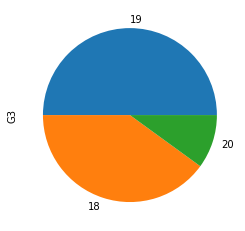

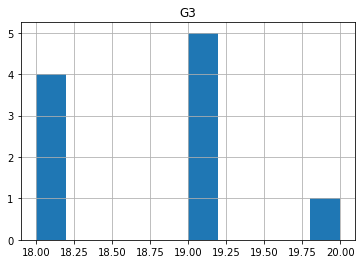

In [252]:
r = ranked_data[:k]
print(len(r[r['G3'] <= 10]))
print(len(r[r['G3'] > 10]))
r['G3'].value_counts().plot(kind='pie')
r.hist(column='G3', xlim=(0, 20))





[0, -1, -1, -1, -1] 159 190
[-1, 0, -1, -1, -1] 81 106
[-1, 1, -1, -1, -1] 105 103
[-1, -1, -1, 0, -1] 136 171
[-1, -1, -1, 1, -1] 50 38
[-1, -1, -1, -1, 10] 56 0


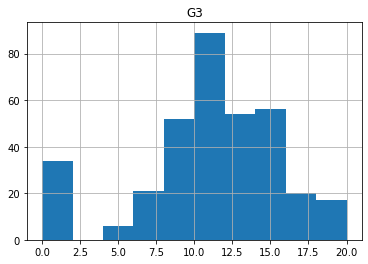

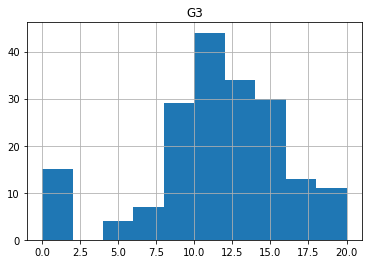

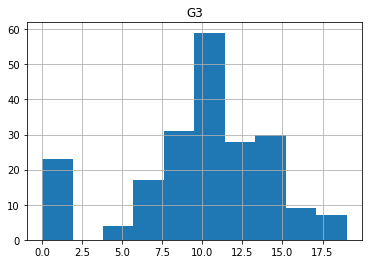

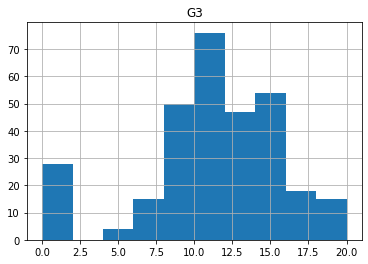

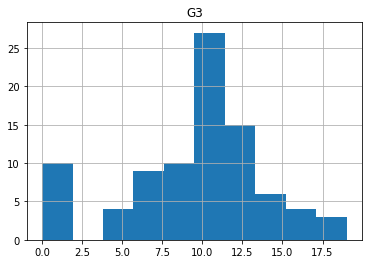

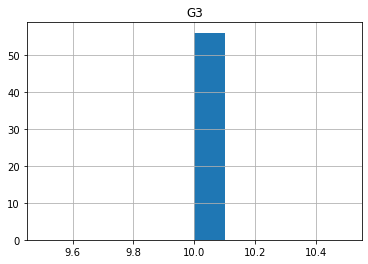

In [257]:
for g in groups:
    tuple_idx = tuples_in_group(g, ranked_data[selected_attributes].copy(deep=True))
    tuples = ranked_data.iloc[tuple_idx]
    print(g, len(tuples[tuples['G3'] <= 10]), len(tuples[tuples['G3'] > 10]))
    tuples.hist(column='G3')
    # tuples['G3'].value_counts().plot(kind='pie')

[1, -1, -1, -1, -1] 27 19


array([[<AxesSubplot:title={'center':'G3'}>]], dtype=object)

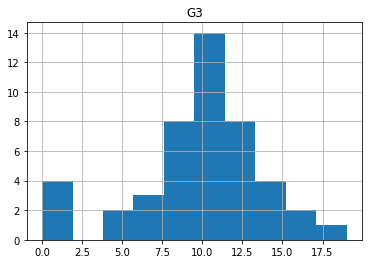

In [259]:
g = [1, -1, -1, -1, -1]
tuple_idx = tuples_in_group(g, ranked_data[selected_attributes].copy(deep=True))
tuples = ranked_data.iloc[tuple_idx]
print(g, len(tuples[tuples['G3'] <= 10]), len(tuples[tuples['G3'] > 10]))
tuples.hist(column='G3')
    # tuples['G3'].value_counts().plot(kind='pie')

In [87]:
print(len(ranked_data[ranked_data['school_C'] == 0]))
print(len(ranked_data[ranked_data['school_C'] == 1]))

349
46


In [86]:
ranked_data.groupby(['address_C', 'school_C']).size()

address_C  school_C
0          0           286
           1            21
1          0            63
           1            25
dtype: int64

group [-1, -1, -1, 1, -1] size 1
[  17.12495517    1.45162338   -0.71906023    4.30748623 -196.20836969]
['school_C', 'sex_C', 'age_C', 'address_C', 'G3']
group [-1, -1, -1, 1, -1] att school_C = 0 size 63
 avg [-4.28123879 -0.08448602 -0.22990361  4.30748623 18.80842814]
group [-1, -1, -1, 1, -1] att school_C = 1 size 25
 avg [ 1.71249552e+01 -6.23856522e-14  1.33539757e+00  4.30748623e+00
  3.93347740e+01]
 wholedataset school=0 / school==1 = 349/46

this group has more school=1, with positive coefficient, so ranked lower.




In [114]:

output_path = r'student_avg_topk_value_seperated_5att.txt'
output_file = open(output_path, "w")
output_file.write(", ".join(selected_attributes))
output_file.write("\n")
print(selected_attributes)
shapley_values_att_value_seperated(ranked_data, [-1,-1,-1,-1,10], selected_attributes, shap_values, output_file)

# for g in groups:
#     shapley_values_att_value_seperated(ranked_data, g, selected_attributes, shap_values, output_file)


['school_C', 'sex_C', 'age_C', 'address_C', 'G3']
group [-1, -1, -1, -1, 10] att school_C = 0 size 46
 avg [-4.28123879e+00  5.25950501e-03 -4.95749599e-01  2.10692261e-01
  1.32667581e+01]
group [-1, -1, -1, -1, 10] att school_C = 1 size 10
 avg [17.12495517  0.24193723 -0.71906023  2.15374312 13.26675809]
group [-1, -1, -1, -1, 10] att sex_C = 0 size 26
 avg [-0.98797818 -1.572592   -0.71906023  0.16567255 13.26675809]
group [-1, -1, -1, -1, 10] att sex_C = 1 size 30
 avg [-4.28694117e-14  1.45162338e+00 -3.76650596e-01  8.97392965e-01
  1.32667581e+01]
group [-1, -1, -1, -1, 10] att age_C = 0 size 55
 avg [-0.38920353  0.02199429 -0.71906023  0.58738449 13.26675809]
group [-1, -1, -1, -1, 10] att age_C = 1 size 1
 avg [-4.28123879  1.45162338  9.55322876 -1.07687156 13.26675809]
group [-1, -1, -1, -1, 10] att address_C = 0 size 39
 avg [-2.08573172 -0.0992563  -0.4556682  -1.07687156 13.26675809]
group [-1, -1, -1, -1, 10] att address_C = 1 size 17
 avg [ 3.27388849  0.38425325 -0.7

not sure how to explain for group [-1,-1,-1,-1,10]

In [117]:

output_path = r'student_avg_topk_value_seperated_5att.txt'
output_file = open(output_path, "w")
output_file.write(", ".join(selected_attributes))
output_file.write("\n")
print(selected_attributes)
shapley_values_att_value_seperated(ranked_data, [-1,1,-1,-1,-1], selected_attributes, shap_values, output_file)

# for g in groups:
#     shapley_values_att_value_seperated(ranked_data, g, selected_attributes, shap_values, output_file)


['school_C', 'sex_C', 'age_C', 'address_C', 'G3']
group [-1, 1, -1, -1, -1] att school_C = 0 size 183
 avg [-4.28123879  1.45162338 -0.04546751 -0.16476723 13.90268744]
group [-1, 1, -1, -1, -1] att school_C = 1 size 25
 avg [17.12495517  1.45162338  0.51361445  1.72299449 15.12875923]
group [-1, 1, -1, -1, -1] att sex_C = 0 size 0
group [-1, 1, -1, -1, -1] att sex_C = 1 size 208
 avg [-1.70837894  1.45162338  0.02172984  0.06212721 14.05005184]
group [-1, 1, -1, -1, -1] att age_C = 0 size 193
 avg [-1.84115451  1.45162338 -0.71906023  0.06695574 11.94020288]
group [-1, 1, -1, -1, -1] att age_C = 1 size 15
 avg [-7.15279687e-14  1.45162338e+00  9.55322876e+00  3.67113747e-15
  4.11967751e+01]
group [-1, 1, -1, -1, -1] att address_C = 0 size 164
 avg [-2.71493192  1.45162338  0.03257067 -1.07687156  9.71873764]
group [-1, 1, -1, -1, -1] att address_C = 1 size 44
 avg [ 2.04331851e+00  1.45162338e+00 -1.86768891e-02  4.30748623e+00
  3.01940411e+01]
group [-1, 1, -1, -1, -1] att G3 = 0 s

In [119]:
print(len(ranked_data[ranked_data['school_C'] == 0]))
print(len(ranked_data[ranked_data['school_C'] == 1]))
print(len(ranked_data[ranked_data['school_C'] == 0]) / len(ranked_data[ranked_data['school_C'] == 1]))

349
46
7.586956521739131


group [-1,1,-1,-1,-1] doesn't have a high shapley value except for G3


In [120]:

output_path = r'student_avg_topk_value_seperated_5att.txt'
output_file = open(output_path, "w")
output_file.write(", ".join(selected_attributes))
output_file.write("\n")
print(selected_attributes)
shapley_values_att_value_seperated(ranked_data, [0,-1,-1,-1,-1], selected_attributes, shap_values, output_file)


['school_C', 'sex_C', 'age_C', 'address_C', 'G3']
group [0, -1, -1, -1, -1] att school_C = 0 size 349
 avg [-4.28123879  0.01317137 -0.13039037 -0.10491012  1.86266804]
group [0, -1, -1, -1, -1] att school_C = 1 size 0
group [0, -1, -1, -1, -1] att sex_C = 0 size 166
 avg [ -4.28123879  -1.572592    -0.22401016  -0.03892307 -11.41036539]
group [0, -1, -1, -1, -1] att sex_C = 1 size 183
 avg [-4.28123879  1.45162338 -0.04546751 -0.16476723 13.90268744]
group [0, -1, -1, -1, -1] att age_C = 0 size 329
 avg [-4.28123879e+00 -7.35371521e-04 -7.19060229e-01 -9.49218090e-02
  3.91218324e-01]
group [0, -1, -1, -1, -1] att age_C = 1 size 20
 avg [-4.28123879  0.24193723  9.55322876 -0.26921789 26.0680159 ]
group [0, -1, -1, -1, -1] att address_C = 0 size 286
 avg [-4.28123879  0.03468331 -0.10846962 -1.07687156 -1.87013925]
group [0, -1, -1, -1, -1] att address_C = 1 size 63
 avg [-4.28123879 -0.08448602 -0.22990361  4.30748623 18.80842814]
group [0, -1, -1, -1, -1] att G3 = 0 size 34
 avg [-4

In [122]:

output_path = r'student_avg_topk_value_seperated_5att.txt'
output_file = open(output_path, "w")
output_file.write(", ".join(selected_attributes))
output_file.write("\n")
print(selected_attributes)
shapley_values_att_value_seperated(ranked_data[:k], [-1,0,-1,-1,-1], selected_attributes, shap_values, output_file)


['school_C', 'sex_C', 'age_C', 'address_C', 'G3']
group [-1, 0, -1, -1, -1] att school_C = 0 size 7
 avg [  -4.28123879   -1.572592     -0.71906023   -1.07687156 -189.55836564]
group [-1, 0, -1, -1, -1] att school_C = 1 size 0
group [-1, 0, -1, -1, -1] att sex_C = 0 size 7
 avg [  -4.28123879   -1.572592     -0.71906023   -1.07687156 -189.55836564]
group [-1, 0, -1, -1, -1] att sex_C = 1 size 0
group [-1, 0, -1, -1, -1] att age_C = 0 size 7
 avg [  -4.28123879   -1.572592     -0.71906023   -1.07687156 -189.55836564]
group [-1, 0, -1, -1, -1] att address_C = 0 size 7
 avg [  -4.28123879   -1.572592     -0.71906023   -1.07687156 -189.55836564]
group [-1, 0, -1, -1, -1] att address_C = 1 size 0
group [-1, 0, -1, -1, -1] att G3 = 18 size 3
 avg [  -4.28123879   -1.572592     -0.71906023   -1.07687156 -172.9333555 ]
group [-1, 0, -1, -1, -1] att G3 = 19 size 3
 avg [  -4.28123879   -1.572592     -0.71906023   -1.07687156 -196.20836969]
group [-1, 0, -1, -1, -1] att G3 = 20 size 1
 avg [  -4

## definition 2: propotional bounds

In [97]:
def string2num(st):
    p = list()
    idx = 0
    item = ''
    i = ''
    for i in st:
        if i == '|':
            if item == '':
                p.append(-1)
            else:
                p.append(int(item))
                item = ''
            idx += 1
        else:
            item += i
    if i != '|':
        p.append(int(item))
    else:
        p.append(-1)
    return p


In [98]:
original_data_file = r"../../../InputData/StudentDataset/ForRanking_1/student-mat_cat_ranked.csv"
ranked_data = pd.read_csv(original_data_file, index_col=False)
selected_attributes = \
    ['school_C', 'sex_C', 'age_C', 'address_C', 'G3']

alpha = 0.8
k = 10
k_min = k
k_max = k
thc = 50
time_limit = 5*60
result1, num_patterns_visited1_, t1_ \
            = newalg2.GraphTraverse(
            ranked_data[selected_attributes], selected_attributes, thc,
            alpha,
            k_min, k_max, time_limit)
groups = [string2num(k) for k in result1[0]]
for g in groups:
    print(g)


time for k_min = 0.02264881134033203
finish kmin
[-1, -1, -1, -1, 10]
[-1, -1, -1, 1, -1]
[-1, 1, -1, -1, -1]


In [99]:
# for the topk
output_path = r'student_avg_topk_5att-def2.txt'
output_file = open(output_path, "w")
output_file.write(", ".join(all_attributes))
output_file.write("\n")
for g in groups:
    average_shapley_values_of_group(ranked_data[:k], g, selected_attributes, shap_values, output_file)


group [-1, -1, -1, -1, 10] size 0
group [-1, -1, -1, 1, -1] size 1
[  17.12495517    1.45162338   -0.71906023    4.30748623 -196.20836969]
group [-1, 1, -1, -1, -1] size 3
[   2.85415919    1.45162338   -0.71906023    0.71791437 -188.45003163]


all of these three groups are included in definition 1 above

# compas

In [182]:

all_attributes = ["age_binary", "sex_binary", "race_C", "MarriageStatus_C", "juv_fel_count_C", "decile_score_C", "juv_misd_count_C", "juv_other_count_C", "priors_count_C", "days_b_screening_arrest_C",
                  "c_days_from_compas_C", "c_charge_degree_C", "v_decile_score_C", "start_C", "end_C",
                  "event_C"]

original_data_file = r"../../../InputData/CompasData/general/compas_data_cat_necessary_att_ranked.csv"

ranked_data = pd.read_csv(original_data_file, index_col=False)

# scoring attributes:
# c days from compas,
# juv other count, days b screening arrest, start, end,
# age, and priors count


## 10 att

In [131]:
selected_attributes = ["sex_binary", "race_C", "MarriageStatus_C",
                       "c_days_from_compas_C", "juv_other_count_C", "days_b_screening_arrest_C", "start_C", "end_C", "age_binary", "priors_count_C"]


In [132]:
k = 10
k_min = k
k_max = k
thc = 50
Lowerbounds = [10]
time_limit = 5*60
data_topk = ranked_data[:k]
result1, num_patterns_visited1_, t1_ \
    = newalg.GraphTraverse(
    ranked_data[selected_attributes], selected_attributes, thc,
    Lowerbounds,
    k_min, k_max, time_limit)
groups = result1[0]
for g in groups:
    print(g)

[1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, 0, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, 1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, 2, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, 0, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, 1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, 2, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, 4, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, 6, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, 0, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, 1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, 2, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, 1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, 2, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, 0, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, 1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, 1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, 2]


In [133]:

x = ranked_data[selected_attributes]
y = ranked_data['rank']

# with sklearn
model = LinearRegression()
model.fit(x, y)
print("Model coefficients:\n")
for i in range(x.shape[1]):
    print(x.columns[i], "=", model.coef_[i].round(5))
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, x)
shap_values = explainer(x)
shap_values

Model coefficients:

sex_binary = -107.24144
race_C = -72.38581
MarriageStatus_C = -19.65683
c_days_from_compas_C = 1376.34782
juv_other_count_C = 960.64362
days_b_screening_arrest_C = 610.92016
start_C = 1306.03391
end_C = 1909.21094
age_binary = 69.8892
priors_count_C = 1335.60502


Exact explainer: 6890it [00:23, 156.87it/s]                          


.values =
array([[   17.15863024,   -32.57361384,     9.82841477, ...,
        -1699.19773791,   -15.37562303,  -173.62865272],
       [   17.15863024,    39.81219469,     9.82841477, ...,
        -1699.19773791,   -15.37562303,  -173.62865272],
       [   17.15863024,    39.81219469,     9.82841477, ...,
        -1699.19773791,   -15.37562303,  -173.62865272],
       ...,
       [  -90.08280874,    39.81219469,     9.82841477, ...,
         2119.22414503,   -15.37562303,  -173.62865272],
       [   17.15863024,    39.81219469,     9.82841477, ...,
         2119.22414503,   -15.37562303,  -173.62865272],
       [   17.15863024,    39.81219469,     9.82841477, ...,
          210.01320356,   -15.37562303,  -173.62865272]])

.base_values =
array([3335.25409875, 3335.25409875, 3335.25409875, ..., 3335.25409875,
       3335.25409875, 3335.25409875])

.data =
array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 2, 0

In [134]:
np.average(shap_values.values, axis=0)

array([-3.51441824, -6.15788984, -1.51085662, 12.5867198 ,  0.83667611,
       22.27566202,  8.72079546, 73.93792816, 11.60004413, -9.02875974])

In [135]:
# for the topk
output_path = r'compas_avg_topk_10att.txt'
output_file = open(output_path, "w")
output_file.write(", ".join(all_attributes))
output_file.write("\n")
for g in groups:
    average_shapley_values_of_group(ranked_data[:k], g, selected_attributes, shap_values, output_file)


group [1, -1, -1, -1, -1, -1, -1, -1, -1, -1] size 0
group [-1, 0, -1, -1, -1, -1, -1, -1, -1, -1] size 7
[   17.15863024    39.81219469     9.82841477     0.
     0.           -89.89253823     0.         -1699.19773791
    -5.39145223  -173.62865272]
group [-1, 1, -1, -1, -1, -1, -1, -1, -1, -1] size 2
[   17.15863024   -32.57361384   -49.14207386     0.
     0.          -177.16684719     0.         -1699.19773791
    19.56897477  -173.62865272]
group [-1, 2, -1, -1, -1, -1, -1, -1, -1, -1] size 1
[   17.15863024  -104.95942236     9.82841477     0.
     0.          -177.16684719     0.         -1699.19773791
   -15.37562303  -173.62865272]
group [-1, -1, 0, -1, -1, -1, -1, -1, -1, -1] size 9
[   17.15863024    15.68359185     9.82841477     0.
     0.          -109.28682911     0.         -1699.19773791
    -7.61015686  -173.62865272]
group [-1, -1, 1, -1, -1, -1, -1, -1, -1, -1] size 0
group [-1, -1, 2, -1, -1, -1, -1, -1, -1, -1] size 0
group [-1, -1, 4, -1, -1, -1, -1, -1, -1, -1]

In [136]:

output_path = r'compas_avg_topk_value_seperated_10att.txt'
output_file = open(output_path, "w")
output_file.write(", ".join(selected_attributes))
output_file.write("\n")
print(selected_attributes)
shapley_values_att_value_seperated(ranked_data, [-1, 0, -1, -1, -1, -1, -1, -1, -1, -1], selected_attributes, shap_values, output_file)

# for g in groups:
#     shapley_values_att_value_seperated(ranked_data, g, selected_attributes, shap_values, output_file)


['sex_binary', 'race_C', 'MarriageStatus_C', 'c_days_from_compas_C', 'juv_other_count_C', 'days_b_screening_arrest_C', 'start_C', 'end_C', 'age_binary', 'priors_count_C']
group [-1, 0, -1, -1, -1, -1, -1, -1, -1, -1] att sex_binary = 0 size 2909
 avg [  17.15863024   39.81219469    2.95629527    9.93582133    0.99069469
   32.21349046   14.36682198 -234.30986532    5.88664514   97.71633434]
group [-1, 0, -1, -1, -1, -1, -1, -1, -1, -1] att sex_binary = 1 size 619
 avg [-90.08280874  39.81219469   1.57191125  26.6820256    0.
  10.35307352   2.10990939 342.64013488   5.17338117 -67.90224557]
group [-1, 0, -1, -1, -1, -1, -1, -1, -1, -1] att race_C = 0 size 3528
 avg [  -1.65725716   39.81219469    2.71340022   12.87400172    0.81687382
   28.37800348   12.21630359 -133.08195996    5.76150047   68.65797239]
group [-1, 0, -1, -1, -1, -1, -1, -1, -1, -1] att race_C = 1 size 0
group [-1, 0, -1, -1, -1, -1, -1, -1, -1, -1] att race_C = 2 size 0
group [-1, 0, -1, -1, -1, -1, -1, -1, -1, -1] a

## 4 att

In [183]:

all_attributes = ["age_binary", "sex_binary", "race_C", "MarriageStatus_C", "juv_fel_count_C", "decile_score_C", "juv_misd_count_C", "juv_other_count_C", "priors_count_C", "days_b_screening_arrest_C",
                  "c_days_from_compas_C", "c_charge_degree_C", "v_decile_score_C", "start_C", "end_C",
                  "event_C"]

original_data_file = r"../../../InputData/CompasData/general/compas_data_cat_necessary_att_ranked.csv"

ranked_data = pd.read_csv(original_data_file, index_col=False)

selected_attributes = ["sex_binary", "race_C", "MarriageStatus_C",
                       "age_binary"]


In [184]:
k = 10
k_min = k
k_max = k
thc = 50
Lowerbounds = [5]
time_limit = 5*60
data_topk = ranked_data[:k]
result1, num_patterns_visited1_, t1_ \
    = newalg.GraphTraverse(
    ranked_data[selected_attributes], selected_attributes, thc,
    Lowerbounds,
    k_min, k_max, time_limit)
groups = result1[0]
for g in groups:
    print(g)

[1, -1, -1, -1]
[-1, 1, -1, -1]
[-1, 2, -1, -1]
[-1, -1, 1, -1]
[-1, -1, 2, -1]
[-1, -1, 4, -1]
[-1, -1, 6, -1]
[-1, -1, -1, 1]


In [185]:

x = ranked_data[selected_attributes]
y = ranked_data['rank']

# with sklearn
model = LinearRegression()
model.fit(x, y)
print("Model coefficients:\n")
for i in range(x.shape[1]):
    print(x.columns[i], "=", model.coef_[i].round(5))
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, x)
shap_values = explainer(x)
shap_values


Model coefficients:

sex_binary = 145.48688
race_C = 46.18449
MarriageStatus_C = 16.64004
age_binary = 758.73914


Exact explainer: 6890it [00:18, 164.90it/s]                          


.values =
array([[ -23.27790129,   20.78302007,   -8.32002067, -166.92260972],
       [ -23.27790129,  -25.40146897,   -8.32002067, -166.92260972],
       [ -23.27790129,  -25.40146897,   -8.32002067, -166.92260972],
       ...,
       [ 122.20898177,  -25.40146897,   -8.32002067, -166.92260972],
       [ -23.27790129,  -25.40146897,   -8.32002067, -166.92260972],
       [ -23.27790129,  -25.40146897,   -8.32002067, -166.92260972]])

.base_values =
array([3309.09058756, 3309.09058756, 3309.09058756, ..., 3309.09058756,
       3309.09058756, 3309.09058756])

.data =
array([[0, 1, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       ...,
       [1, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [186]:
output_path = r'compas_avg_topk_4att.txt'
output_file = open(output_path, "w")
output_file.write(", ".join(all_attributes))
output_file.write("\n")
for g in groups:
    average_shapley_values_of_group(ranked_data[:k], g, selected_attributes, shap_values, output_file)


group [1, -1, -1, -1] size 0
group [-1, 1, -1, -1] size 2
[-23.27790129  20.78302007  41.60010336 212.44695783]
group [-1, 2, -1, -1] size 1
[ -23.27790129   66.9675091    -8.32002067 -166.92260972]
group [-1, -1, 1, -1] size 0
group [-1, -1, 2, -1] size 0
group [-1, -1, 4, -1] size 0
group [-1, -1, 6, -1] size 1
[-23.27790129  20.78302007  91.52022739 591.81652538]
group [-1, -1, -1, 1] size 2
[-23.27790129  -2.30922445  41.60010336 591.81652538]


In [187]:


output_path = r'compas_avg_topk_value_seperated_4att.txt'
output_file = open(output_path, "w")
output_file.write(", ".join(selected_attributes))
output_file.write("\n")
print(selected_attributes)
shapley_values_att_value_seperated(ranked_data, [-1, -1, -1, 1], selected_attributes, shap_values, output_file)


['sex_binary', 'race_C', 'MarriageStatus_C', 'age_binary']
group [-1, -1, -1, 1] att sex_binary = 0 size 2130
 avg [-23.27790129   9.18269066   8.05440499 591.81652538]
group [-1, -1, -1, 1] att sex_binary = 1 size 529
 avg [122.20898177  11.35405066  14.10786114 591.81652538]
group [-1, -1, -1, 1] att race_C = 0 size 1067
 avg [  1.53804315 -25.40146897   3.46992427 591.81652538]
group [-1, -1, -1, 1] att race_C = 1 size 1168
 avg [ 10.72716641  20.78302007  13.80496581 591.81652538]
group [-1, -1, -1, 1] att race_C = 2 size 424
 avg [  2.11367736  66.9675091   11.30266959 591.81652538]
group [-1, -1, -1, 1] att MarriageStatus_C = 0 size 1629
 avg [  3.15802099   4.62270162  -8.32002067 591.81652538]
group [-1, -1, -1, 1] att MarriageStatus_C = 1 size 541
 avg [  4.95892444  18.90490776   8.32002067 591.81652538]
group [-1, -1, -1, 1] att MarriageStatus_C = 2 size 116
 avg [ 14.34801674  17.99602504  24.96006201 591.81652538]
group [-1, -1, -1, 1] att MarriageStatus_C = 3 size 15
 avg

In [188]:
ranked_data['MarriageStatus_C'].value_counts()

0    5374
1     785
6     303
4     193
2     169
5      33
3      32
Name: MarriageStatus_C, dtype: int64

<AxesSubplot:ylabel='MarriageStatus_C'>

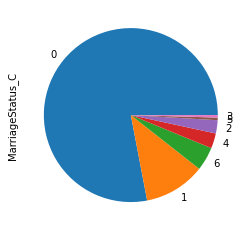

In [189]:
ranked_data['MarriageStatus_C'].value_counts().plot(kind='pie')

2659


<AxesSubplot:ylabel='MarriageStatus_C'>

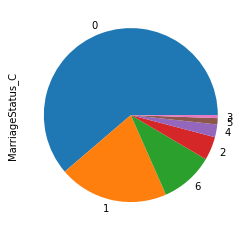

In [190]:
tuple_idx = tuples_in_group([-1, -1, -1, 1], ranked_data[selected_attributes].copy(deep=True))
print(len(tuple_idx))
tuples = ranked_data.iloc[tuple_idx]
tuples['MarriageStatus_C'].value_counts().plot(kind='pie')

In [191]:

output_path = r'compas_avg_topk_value_seperated_4att.txt'
output_file = open(output_path, "w")
output_file.write(", ".join(selected_attributes))
output_file.write("\n")
print(selected_attributes)
shapley_values_att_value_seperated(ranked_data, [-1, 1, -1, -1], selected_attributes, shap_values, output_file)

['sex_binary', 'race_C', 'MarriageStatus_C', 'age_binary']
group [-1, 1, -1, -1] att sex_binary = 0 size 1805
 avg [-23.27790129  20.78302007   4.51263171 209.29430214]
group [-1, 1, -1, -1] att sex_binary = 1 size 542
 avg [122.20898177  20.78302007   8.32002067 215.24673323]
group [-1, 1, -1, -1] att race_C = 0 size 0
group [-1, 1, -1, -1] att race_C = 1 size 2347
 avg [ 10.31983651  20.78302007   5.39188387 210.66891554]
group [-1, 1, -1, -1] att race_C = 2 size 0
group [-1, 1, -1, -1] att MarriageStatus_C = 0 size 1726
 avg [  7.99419235  20.78302007  -8.32002067 135.07842493]
group [-1, 1, -1, -1] att MarriageStatus_C = 1 size 280
 avg [ 15.69179953  20.78302007   8.32002067 426.51978523]
group [-1, 1, -1, -1] att MarriageStatus_C = 2 size 52
 avg [ 21.4872935   20.78302007  24.96006201 372.94946718]
group [-1, 1, -1, -1] att MarriageStatus_C = 3 size 8
 avg [ -5.09204091  20.78302007  41.60010336 212.44695783]
group [-1, 1, -1, -1] att MarriageStatus_C = 4 size 70
 avg [ 12.05462

2347


<AxesSubplot:ylabel='MarriageStatus_C'>

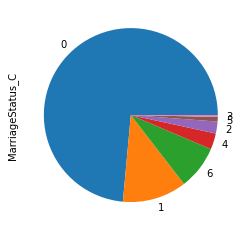

In [192]:
tuple_idx = tuples_in_group([-1, 1, -1, -1], ranked_data[selected_attributes].copy(deep=True))
print(len(tuple_idx))
tuples = ranked_data.iloc[tuple_idx]
tuples['MarriageStatus_C'].value_counts().plot(kind='pie')

In [199]:


output_path = r'compas_avg_topk_value_seperated_4att.txt'
output_file = open(output_path, "w")
output_file.write(", ".join(selected_attributes))
output_file.write("\n")
print(selected_attributes)
shapley_values_att_value_seperated(ranked_data, [-1, -1, 4, -1], selected_attributes, shap_values, output_file)


['sex_binary', 'race_C', 'MarriageStatus_C', 'age_binary']
group [-1, -1, 4, -1] att sex_binary = 0 size 145
 avg [-23.27790129   4.85733419  58.2401447   94.7115748 ]
group [-1, -1, 4, -1] att sex_binary = 1 size 48
 avg [122.20898177   8.27472095  58.2401447   38.56923937]
group [-1, -1, 4, -1] att race_C = 0 size 93
 avg [ 11.13835062 -25.40146897  58.2401447   69.67346466]
group [-1, -1, 4, -1] att race_C = 1 size 70
 avg [ 12.05462745  20.78302007  58.2401447  147.41217482]
group [-1, -1, 4, -1] att race_C = 2 size 30
 avg [ 20.36816363  66.9675091   58.2401447  -40.46608721]
group [-1, -1, 4, -1] att MarriageStatus_C = 0 size 0
group [-1, -1, 4, -1] att MarriageStatus_C = 1 size 0
group [-1, -1, 4, -1] att MarriageStatus_C = 2 size 0
group [-1, -1, 4, -1] att MarriageStatus_C = 3 size 0
group [-1, -1, 4, -1] att MarriageStatus_C = 4 size 193
 avg [12.90536496  5.70725421 58.2401447  80.74871417]
group [-1, -1, 4, -1] att MarriageStatus_C = 5 size 0
group [-1, -1, 4, -1] att Marri

<AxesSubplot:ylabel='sex_binary'>

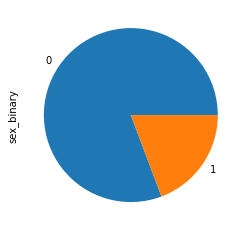

In [201]:
ranked_data['sex_binary'].value_counts().plot(kind='pie')

In [203]:
print(ranked_data['sex_binary'].value_counts())
5561/1328

0    5561
1    1328
Name: sex_binary, dtype: int64


4.1875

group [-1, -1, 4, -1] att sex_binary = 0 size 145
 avg [-23.27790129   4.85733419  58.2401447   94.7115748 ]
group [-1, -1, 4, -1] att sex_binary = 1 size 48
 avg [122.20898177   8.27472095  58.2401447   38.56923937]
 145/48 = 3.02
 this group has too many sex=1

## definition 2

In [205]:

alpha = 0.8
k = 10
k_min = k
k_max = k
thc = 50
time_limit = 5*60
result1, num_patterns_visited1_, t1_ \
            = newalg2.GraphTraverse(
            ranked_data[selected_attributes], selected_attributes, thc,
            alpha,
            k_min, k_max, time_limit)
groups = [string2num(k) for k in result1[0]]
for g in groups:
    print(g)

stop here
time for k_min = 0.04912996292114258
finish kmin
[-1, -1, -1, 1]
[1, -1, -1, -1]
[-1, 0, 6, -1]
[-1, 1, -1, -1]
[-1, -1, 1, -1]
[-1, -1, 4, -1]
[-1, 2, -1, -1]
[-1, -1, 2, -1]


In [206]:
# for the topk
output_path = r'compas_avg_topk_4att_def2.txt'
output_file = open(output_path, "w")
output_file.write(", ".join(all_attributes))
output_file.write("\n")
for g in groups:
    average_shapley_values_of_group(ranked_data[:k], g, selected_attributes, shap_values, output_file)


group [-1, -1, -1, 1] size 2
[-23.27790129  -2.30922445  41.60010336 591.81652538]
group [1, -1, -1, -1] size 0
group [-1, 0, 6, -1] size 0
group [-1, 1, -1, -1] size 2
[-23.27790129  20.78302007  41.60010336 212.44695783]
group [-1, -1, 1, -1] size 0
group [-1, -1, 4, -1] size 0
group [-1, 2, -1, -1] size 1
[ -23.27790129   66.9675091    -8.32002067 -166.92260972]
group [-1, -1, 2, -1] size 0


In [209]:

output_path = r'compas_avg_topk_value_seperated_4att_def2.txt'
output_file = open(output_path, "w")
output_file.write(", ".join(selected_attributes))
output_file.write("\n")
print(selected_attributes)
shapley_values_att_value_seperated(ranked_data, [-1, 0, 6, -1], selected_attributes, shap_values, output_file)

['sex_binary', 'race_C', 'MarriageStatus_C', 'age_binary']
group [-1, 0, 6, -1] att sex_binary = 0 size 53
 avg [-23.27790129 -25.40146897  91.52022739 462.97403074]
group [-1, 0, 6, -1] att sex_binary = 1 size 14
 avg [122.20898177 -25.40146897  91.52022739 429.22956786]
group [-1, 0, 6, -1] att race_C = 0 size 67
 avg [  7.12234293 -25.40146897  91.52022739 455.92294894]
group [-1, 0, 6, -1] att race_C = 1 size 0
group [-1, 0, 6, -1] att race_C = 2 size 0
group [-1, 0, 6, -1] att MarriageStatus_C = 0 size 0
group [-1, 0, 6, -1] att MarriageStatus_C = 1 size 0
group [-1, 0, 6, -1] att MarriageStatus_C = 2 size 0
group [-1, 0, 6, -1] att MarriageStatus_C = 3 size 0
group [-1, 0, 6, -1] att MarriageStatus_C = 4 size 0
group [-1, 0, 6, -1] att MarriageStatus_C = 5 size 0
group [-1, 0, 6, -1] att MarriageStatus_C = 6 size 67
 avg [  7.12234293 -25.40146897  91.52022739 455.92294894]
group [-1, 0, 6, -1] att age_binary = 0 size 12
 avg [  13.09381948  -25.40146897   91.52022739 -166.922609

In [210]:
print(ranked_data['sex_binary'].value_counts())
5561/1328

0    5561
1    1328
Name: sex_binary, dtype: int64


4.1875

group [-1, 0,6, -1] has 12 age=0, 55 age = 1, too many age =1
whole dataset has 5561, 1328

# german credit dataset

In [213]:


all_attributes = ['StatusExistingAcc', 'DurationMonth_C', 'CreditHistory', 'Purpose', 'CreditAmount_C',
                  'SavingsAccount', 'EmploymentLength', 'InstallmentRate', 'MarriedNSex', 'Debtors',
                  'ResidenceLength', 'Property', 'Age_C', 'InstallmentPlans', 'Housing',
                  'ExistingCredit', 'Job', 'NumPeopleLiable', 'Telephone', 'ForeignWorker']



original_data_file = r"../../../InputData/GermanCredit/GermanCredit_ranked.csv"

ranked_data = pd.read_csv(original_data_file, index_col=False)

# scoring attributes:
# I guess they are 'DurationMonth_C', 'CreditAmount_C'

selected_attributes = ["DurationMonth_C", "CreditAmount_C", "StatusExistingAcc",
                       "Age_C"]


In [214]:
k = 10
k_min = k
k_max = k
thc = 50
Lowerbounds = [5]
time_limit = 5*60
data_topk = ranked_data[:k]
result1, num_patterns_visited1_, t1_ \
    = newalg.GraphTraverse(
    ranked_data[selected_attributes], selected_attributes, thc,
    Lowerbounds,
    k_min, k_max, time_limit)
groups = result1[0]
for g in groups:
    print(g)

[2, -1, -1, -1]
[-1, 1, -1, -1]
[-1, 2, -1, -1]
[-1, -1, 12, -1]
[-1, -1, 13, -1]
[-1, -1, 14, -1]
[-1, -1, -1, 1]
[-1, -1, -1, 2]
[-1, -1, -1, 3]
[1, 3, -1, -1]
[1, -1, 11, -1]
[-1, 3, 11, -1]


In [215]:

x = ranked_data[selected_attributes]
y = ranked_data['rank']

# with sklearn
model = LinearRegression()
model.fit(x, y)
print("Model coefficients:\n")
for i in range(x.shape[1]):
    print(x.columns[i], "=", model.coef_[i].round(5))
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, x)
shap_values = explainer(x)
shap_values


Model coefficients:

DurationMonth_C = -98.98433
CreditAmount_C = -14.44821
StatusExistingAcc = -10.38902
Age_C = -125.50246


.values =
array([[-81.16715291, -18.20475043,   7.27231722, -52.71103157],
       [-81.16715291,  -3.7565358 ,  17.66134183, -52.71103157],
       [ 17.81717991,  -3.7565358 ,  17.66134183,  72.79142454],
       ...,
       [ 17.81717991,  10.69167882,  17.66134183,  72.79142454],
       [ 17.81717991,  -3.7565358 ,  17.66134183,  72.79142454],
       [ 17.81717991, -18.20475043,   7.27231722,  72.79142454]])

.base_values =
array([506.44777645, 506.44777645, 506.44777645, 506.44777645,
       506.44777645, 506.44777645, 506.44777645, 506.44777645,
       506.44777645, 506.44777645, 506.44777645, 506.44777645,
       506.44777645, 506.44777645, 506.44777645, 506.44777645,
       506.44777645, 506.44777645, 506.44777645, 506.44777645,
       506.44777645, 506.44777645, 506.44777645, 506.44777645,
       506.44777645, 506.44777645, 506.44777645, 506.44777645,
       506.44777645, 506.44777645, 506.44777645, 506.44777645,
       506.44777645, 506.44777645, 506.44777645, 506.44777645,
    

In [216]:
output_path = r'german_avg_topk_4att.txt'
output_file = open(output_path, "w")
output_file.write(", ".join(all_attributes))
output_file.write("\n")
for g in groups:
    average_shapley_values_of_group(ranked_data[:k], g, selected_attributes, shap_values, output_file)


group [2, -1, -1, -1] size 4
[-81.16715291 -14.59269677   7.27231722 -21.33541754]
group [-1, 1, -1, -1] size 1
[  17.81717991   10.69167882  -13.50573199 -178.21348768]
group [-1, 2, -1, -1] size 3
[-15.1775977   -3.7565358   14.19833363  30.95727251]
group [-1, -1, 12, -1] size 2
[-31.6749865  -10.98064312   7.27231722  10.04019649]
group [-1, -1, 13, -1] size 0
group [-1, -1, 14, -1] size 2
[ -31.6749865    -3.7565358   -13.50573199 -115.46225962]
group [-1, -1, -1, 1] size 4
[ -6.9289033  -10.98064312  15.06408568  72.79142454]
group [-1, -1, -1, 2] size 4
[-56.42106971 -14.59269677   7.27231722 -52.71103157]
group [-1, -1, -1, 3] size 2
[ -81.16715291   -3.7565358     2.07780492 -178.21348768]
group [1, 3, -1, -1] size 2
[ 17.81717991 -18.20475043  17.66134183  10.04019649]
group [1, -1, 11, -1] size 3
[ 17.81717991 -13.38867889  17.66134183  30.95727251]
group [-1, 3, 11, -1] size 4
[-56.42106971 -18.20475043  17.66134183 -21.33541754]


In [220]:


output_path = r'german_avg_topk_value_seperated_4att.txt'
output_file = open(output_path, "w")
output_file.write(", ".join(selected_attributes))
output_file.write("\n")
print(selected_attributes)
shapley_values_att_value_seperated(ranked_data, [-1, 1, -1, -1], selected_attributes, shap_values, output_file)
# group [-1, 1, -1, -1] size 1
# [  17.81717991   10.69167882  -13.50573199 -178.21348768]


['DurationMonth_C', 'CreditAmount_C', 'StatusExistingAcc', 'Age_C']
group [-1, 1, -1, -1] att DurationMonth_C = 1 size 422
 avg [17.81717991 10.69167882  0.89611492 -1.85577091]
group [-1, 1, -1, -1] att DurationMonth_C = 2 size 10
 avg [-81.16715291  10.69167882   3.11670738 -40.16078596]
group [-1, 1, -1, -1] att DurationMonth_C = 3 size 0
group [-1, 1, -1, -1] att CreditAmount_C = 1 size 432
 avg [15.52587591 10.69167882  0.94751752 -2.74246108]
group [-1, 1, -1, -1] att CreditAmount_C = 2 size 0
group [-1, 1, -1, -1] att CreditAmount_C = 3 size 0
group [-1, 1, -1, -1] att StatusExistingAcc = 11 size 117
 avg [15.27912009 10.69167882 17.66134183 -1.22284444]
group [-1, 1, -1, -1] att StatusExistingAcc = 12 size 107
 avg [15.04191824 10.69167882  7.27231722 15.31833717]
group [-1, 1, -1, -1] att StatusExistingAcc = 13 size 36
 avg [ 15.06761511  10.69167882  -3.11670738 -21.33541754]
group [-1, 1, -1, -1] att StatusExistingAcc = 14 size 172
 avg [ 16.09070899  10.69167882 -13.5057319

<AxesSubplot:ylabel='DurationMonth_C'>

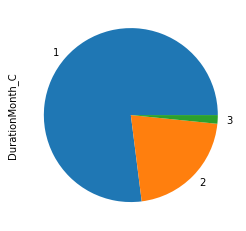

In [221]:
ranked_data['DurationMonth_C'].value_counts().plot(kind='pie')

group [-1, 1, -1, -1] size 1
[  17.81717991   10.69167882  -13.50573199 -178.21348768]
it has too many DurationMonth_C = 1



## definition 2


In [222]:

alpha = 0.8
k = 10
k_min = k
k_max = k
thc = 50
time_limit = 5*60
result1, num_patterns_visited1_, t1_ \
            = newalg2.GraphTraverse(
            ranked_data[selected_attributes], selected_attributes, thc,
            alpha,
            k_min, k_max, time_limit)
groups = [string2num(k) for k in result1[0]]
for g in groups:
    print(g)

time for k_min = 0.04862093925476074
finish kmin
[-1, -1, 14, -1]
[-1, -1, 13, -1]
[-1, -1, -1, 1]
[-1, 1, -1, -1]
[-1, -1, 12, -1]
[1, -1, -1, -1]


In [223]:
# for the topk
output_path = r'german_avg_topk_4att_def2.txt'
output_file = open(output_path, "w")
output_file.write(", ".join(all_attributes))
output_file.write("\n")
for g in groups:
    average_shapley_values_of_group(ranked_data[:k], g, selected_attributes, shap_values, output_file)


group [-1, -1, 14, -1] size 2
[ -31.6749865    -3.7565358   -13.50573199 -115.46225962]
group [-1, -1, 13, -1] size 0
group [-1, -1, -1, 1] size 4
[ -6.9289033  -10.98064312  15.06408568  72.79142454]
group [-1, 1, -1, -1] size 1
[  17.81717991   10.69167882  -13.50573199 -178.21348768]
group [-1, -1, 12, -1] size 2
[-31.6749865  -10.98064312   7.27231722  10.04019649]
group [1, -1, -1, -1] size 5
[17.81717991 -6.64617873  9.35012215 -2.51004912]


In [231]:


output_path = r'german_avg_topk_value_seperated_4att.txt'
output_file = open(output_path, "w")
output_file.write(", ".join(selected_attributes))
output_file.write("\n")
print(selected_attributes)
shapley_values_att_value_seperated(ranked_data, [-1, 1, -1, -1], selected_attributes, shap_values, output_file)
# group [-1, 1, -1, -1] size 1
# [  17.81717991   10.69167882  -13.50573199 -178.21348768]


['DurationMonth_C', 'CreditAmount_C', 'StatusExistingAcc', 'Age_C']
group [-1, 1, -1, -1] att DurationMonth_C = 1 size 422
 avg [17.81717991 10.69167882  0.89611492 -1.85577091]
group [-1, 1, -1, -1] att DurationMonth_C = 2 size 10
 avg [-81.16715291  10.69167882   3.11670738 -40.16078596]
group [-1, 1, -1, -1] att DurationMonth_C = 3 size 0
group [-1, 1, -1, -1] att CreditAmount_C = 1 size 432
 avg [15.52587591 10.69167882  0.94751752 -2.74246108]
group [-1, 1, -1, -1] att CreditAmount_C = 2 size 0
group [-1, 1, -1, -1] att CreditAmount_C = 3 size 0
group [-1, 1, -1, -1] att StatusExistingAcc = 11 size 117
 avg [15.27912009 10.69167882 17.66134183 -1.22284444]
group [-1, 1, -1, -1] att StatusExistingAcc = 12 size 107
 avg [15.04191824 10.69167882  7.27231722 15.31833717]
group [-1, 1, -1, -1] att StatusExistingAcc = 13 size 36
 avg [ 15.06761511  10.69167882  -3.11670738 -21.33541754]
group [-1, 1, -1, -1] att StatusExistingAcc = 14 size 172
 avg [ 16.09070899  10.69167882 -13.5057319

In [260]:
ranked_data['DurationMonth_C'].value_counts().plot(kind='bar')

KeyError: 'DurationMonth_C'

group [-1, 1, -1, -1] size 1
[  17.81717991   10.69167882  -13.50573199 -178.21348768]
has too many DurationMonth_C = 1
group [-1, 1, -1, -1] att DurationMonth_C = 1 size 422
 avg [17.81717991 10.69167882  0.89611492 -1.85577091]
group [-1, 1, -1, -1] att DurationMonth_C = 2 size 10
 avg [-81.16715291  10.69167882   3.11670738 -40.16078596]
group [-1, 1, -1, -1] att DurationMonth_C = 3 size 0